## 0. Read Dataset


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [3]:
from sklearn.preprocessing import StandardScaler

In [4]:
from sklearn import svm

In [5]:
df = pd.read_csv("csv_result-heart-statlog.csv")
df.columns

Index(['id', 'age', 'sex', 'chest', 'resting_blood_pressure',
       'serum_cholestoral', 'fasting_blood_sugar',
       'resting_electrocardiographic_results', 'maximum_heart_rate_achieved',
       'exercise_induced_angina', 'oldpeak', 'slope',
       'number_of_major_vessels', 'thal', 'class'],
      dtype='object')

In [6]:
df.drop("id", inplace = True, axis =1)

In [7]:
df.head()

,age,sex,chest,resting_blood_pressure,serum_cholestoral,fasting_blood_sugar,resting_electrocardiographic_results,maximum_heart_rate_achieved,exercise_induced_angina,oldpeak,slope,number_of_major_vessels,thal,class
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,present
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,absent
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,present
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,absent
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,absent


In [8]:
df.shape

(270, 14)

**Check if NULL Values are Present**

In [9]:
df.isna().sum()

age                                     0
sex                                     0
chest                                   0
resting_blood_pressure                  0
serum_cholestoral                       0
fasting_blood_sugar                     0
resting_electrocardiographic_results    0
maximum_heart_rate_achieved             0
exercise_induced_angina                 0
oldpeak                                 0
slope                                   0
number_of_major_vessels                 0
thal                                    0
class                                   0
dtype: int64

In [10]:
for col in df:
   a = (df[col] == "?").sum()
   print(a)

0
0
0
0
0
0
0
0
0
0
0
0
0
0


**Encode the Output Class**

In [11]:
df["class"] = np.where(df["class"] == "present", 1, 0)

**Train Test Split**

In [12]:
X = df.iloc[: , 0:13]
y = df.iloc[: , 13]
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size = 0.3, random_state = 123)

**Standardization**

In [13]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## 1. Running SVM

In [14]:
clf = svm.SVC()
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)
print("accuracy = ", accuracy_score(y_test, predictions))

accuracy =  0.7777777777777778


In [15]:
confusion_matrix(y_test,predictions)

array([[36,  9],
       [ 9, 27]])

**1) [3 pts] show the accuracies of SVC by changing kernel to ‘linear’, ‘poly’, ‘rbf’, and ‘sigmoid’,
respectively. Which kernel function shows the best accuracy ? and explain why ?**

The choice of kernel depends on the dataset. Since, all of the kernels give similar accuracy, it is best to choose the linear kernel since its the least complex.

In [16]:
kernel = ['linear', 'rbf', 'poly', 'sigmoid']
acc = []

for i in range(len(kernel)):
    clf = svm.SVC(kernel = kernel[i])
    clf.fit(X_train, y_train)
    predictions = clf.predict(X_test)
    accuracy = (accuracy_score(y_test, predictions))
    acc.append(accuracy)

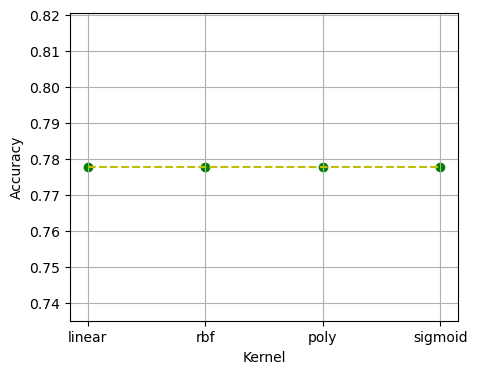

In [17]:
plt.figure(figsize = [5,4])
plt.plot(kernel, acc, ls = "dashed", color = "y")
plt.scatter(kernel, acc,color = "g")


plt.xlabel("Kernel")
plt.ylabel("Accuracy")
plt.grid()

**2) [3 pts] Now you use ‘poly’ kernel. Change the value of coef0 multiple times to your own choice
and show the difference in accuracy. Roughly speaking, it controls how much the model is
influenced by high-degree polynomials. Explain the results of this experiments.**

The coef hyperparameter defines the degree of polynomial. The data is linear, so the model performs the best with coef0 = 0.


In [18]:
coef = [0, 1 , 2, 3]
acc = []

for i in range(len(coef)):
    clf = svm.SVC(kernel = 'poly', coef0 = coef[i])
    clf.fit(X_train, y_train)
    predictions = clf.predict(X_test)
    accuracy = (accuracy_score(y_test, predictions))
    acc.append(accuracy)

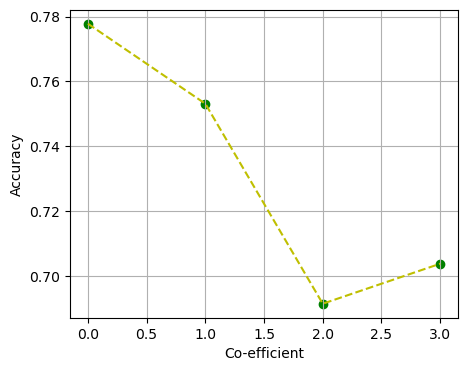

In [19]:
plt.figure(figsize = [5,4])
plt.plot(coef, acc, ls = "dashed", color = "y")
plt.scatter(coef, acc,color = "g")


plt.xlabel("Co-efficient")
plt.ylabel("Accuracy")
plt.grid()

**3) [8 pts] compare the accuracy of SVC with that of IBL, RandomForest, and AdaBoost,
respectively (algorithms in HW 2). Compare the results and explain the differences in accuracy
between these algorithms in your own words.**

The accuracies of SVC, IBL, RandomForest, and AdaBoost are 0.78, 0.81, 0.84, and 0.80. The data is noisy and there are multiple instances where the data overlaps. For this, SVC doesnt perform as well. But, Random Forest does.


## 2. Clustering (K Means)

In [20]:
kmeans = KMeans(n_clusters=4, max_iter=600, algorithm = 'auto', random_state=0)
kmeans.fit(X_train)
labels = kmeans.predict(X_train)
# cluster labels for each data
label = kmeans.labels_
# center of each clusters
centroids = kmeans.cluster_centers_
# distance within cluster
print("Inertia for KMeans with 4 clusters = %lf " %(kmeans.inertia_))

Inertia for KMeans with 4 clusters = 1690.541462 


/home/manishakarim/miniconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/manishakarim/miniconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(


**1) [3 pts] Run KMeans 3 times by changing n_clusters = 2, 3, 5, 7 respectively and show the
mean of each cluster**

In [21]:
n = [2, 3, 5, 7]


for i in range(len(n)):
        kmeans = KMeans(n_clusters=n[i], max_iter=600, random_state=0)
        kmeans.fit(X_train)
        labels = kmeans.predict(X_train)
        # cluster labels for each data
        label = kmeans.labels_
        # center of each clusters
        centroids = kmeans.cluster_centers_
        # distance within cluster
        print("Inertia for KMeans with %i" %(n[i]) + " clusters = %lf " %(kmeans.inertia_))

Inertia for KMeans with 2 clusters = 1993.669987 
Inertia for KMeans with 3 clusters = 1833.438821 
Inertia for KMeans with 5 clusters = 1610.329181 
Inertia for KMeans with 7 clusters = 1456.441524 


/home/manishakarim/miniconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/manishakarim/miniconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/manishakarim/miniconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/manishakarim/miniconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_

**2) [3 pts] For the clustering of n_clusters=3, pick one cluster. Show the average value of each
attribute of the data in that cluster.**

In [22]:
kmeans = KMeans(n_clusters=3, max_iter=600, algorithm = 'auto', random_state=0)
kmeans.fit(X_train)
labels = kmeans.predict(X_train)
# cluster labels for each data
label = kmeans.labels_
# center of each clusters
centroids = kmeans.cluster_centers_[0]  #Centroids of 1st cluster
attributes = X.columns

pd.DataFrame({'attributes':attributes, 'average':centroids})

/home/manishakarim/miniconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/manishakarim/miniconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(


,attributes,average
0,age,0.391946
1,sex,-1.268170
2,chest,-0.219896
3,resting_blood_pressure,0.124438
4,serum_cholestoral,0.431571
5,fasting_blood_sugar,-0.167381
6,resting_electrocardiographic_results,-0.076750
7,maximum_heart_rate_achieved,0.050043
8,exercise_induced_angina,-0.524834
9,oldpeak,-0.365494


**3) [3 pts] For each cluster, calculate majority (the most frequent) value of class/target value. (let’s
call this ‘cluster label’)**

In [23]:
kmeans = KMeans(n_clusters=3, max_iter=600, algorithm = 'auto', random_state=0)
kmeans.fit(X_train)
labels = kmeans.predict(X_train)
# cluster labels for each data
label = kmeans.labels_
# center of each clusters
cluster_label = pd.DataFrame({'y' : y_train, 'label': label})

print('\n cluster_label = 0 \n',(cluster_label[label == 0]).value_counts())
print('\n cluster_label = 1 \n',(cluster_label[label == 1]).value_counts())
print('\n cluster_label = 2 \n',(cluster_label[label == 2]).value_counts())



 cluster_label = 0 
 y  label
0  0        44
1  0         5
Name: count, dtype: int64

 cluster_label = 1 
 y  label
0  1        54
1  1        17
Name: count, dtype: int64

 cluster_label = 2 
 y  label
1  2        62
0  2         7
Name: count, dtype: int64


/home/manishakarim/miniconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/manishakarim/miniconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(


**4) [5 pts] Suppose each of X_test is classified based on ‘cluster labels’, calculate the accuracy.**


In [24]:
kmeans = KMeans(n_clusters=2, max_iter=600, algorithm = 'auto', random_state=0)
kmeans.fit(X_train)
y_pred = kmeans.predict(X_test)

print('accuracy = ', accuracy_score(y_pred, y_test))

/home/manishakarim/miniconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/manishakarim/miniconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(


accuracy =  0.18518518518518517


**5) [3 pts] Run KMeans 3 times by changing n_init values (your own choice of n_init). Compare
the performance of each.**

In [25]:
n = [25, 50, 100]


for i in range(len(n)):
        kmeans = KMeans(n_clusters= 2, n_init = n[i], max_iter=600, random_state=0)
        kmeans.fit(X_train)
        y_pred = kmeans.predict(X_test)
        # distance within cluster
        print("Accuracy for KMeans with %i" %(n[i]) + " n_iter = ", accuracy_score(y_pred, y_test))

Accuracy for KMeans with 25 n_iter =  0.18518518518518517
Accuracy for KMeans with 50 n_iter =  0.18518518518518517
Accuracy for KMeans with 100 n_iter =  0.18518518518518517


## 3. Clustering (EM)

In [26]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=4).fit(X_train)
# predict the labels for data points
labels = gmm.predict(X_train)
# probabilistic cluster assignments
probs = gmm.predict_proba(X_train)
print(probs[:5].round(3))


[[0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]]


**1) [3 pts] run GaussianMixture 4 times by changing n_components = 2, 3, 4, 5 respectively.**

In [27]:
n = [2, 3, 4, 5]

for i in range(len(n)):
    gmm = GaussianMixture(n_components=n[i]).fit(X_train)
    # predict the labels for data points
    labels = gmm.predict(X_train)
    # probabilistic cluster assignments
    probs = gmm.predict_proba(X_train)
    print('n_components = ', n[i])
    print(probs[:5].round())


n_components =  2
[[0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]]
n_components =  3
[[0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]]
n_components =  4
[[1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]]
n_components =  5
[[0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]]


**2) [3 pts] For the clustering of n_components=4, show the predicted labels for the input data.**

In [28]:
gmm = GaussianMixture(n_components=4).fit(X_train)
# predict the labels for data points
labels = gmm.predict(X_train)
# probabilistic cluster assignments
probs = gmm.predict_proba(X_train)

print(labels)


[2 3 3 3 3 1 1 3 3 3 2 1 3 2 3 3 2 3 3 2 3 2 3 1 3 0 1 3 1 3 3 2 3 3 3 2 1
 2 3 3 3 3 1 2 2 3 1 1 2 3 2 1 3 0 2 1 3 1 3 3 2 3 3 3 3 1 3 0 1 3 1 3 2 0
 3 3 2 0 1 3 2 3 1 2 3 0 3 3 3 3 3 2 2 3 2 1 3 3 2 0 0 1 3 2 1 3 2 1 3 2 2
 1 1 3 3 3 3 2 3 2 2 2 1 2 3 3 1 3 3 3 2 2 3 0 3 3 3 1 2 1 1 2 3 1 3 3 2 3
 1 3 2 3 1 3 1 3 3 3 3 1 3 2 2 0 2 3 2 3 2 3 2 3 2 3 2 1 3 1 2 3 3 3 2 2 1
 3 3 0 0]


**3) [3 pts] show the probabilistic cluster assignments. This returns a matrix of size.**

In [29]:
gmm = GaussianMixture(n_components=4).fit(X_train)
# predict the labels for data points
labels = gmm.predict(X_train)
# probabilistic cluster assignments
probs = gmm.predict_proba(X_train)

print(probs)

[[2.65810575e-021 1.39635137e-132 1.00000000e+000 1.69944118e-032]
 [3.41360975e-009 9.80478044e-085 9.99999997e-001 2.33607343e-034]
 [5.29768002e-006 9.99994702e-001 0.00000000e+000 2.44117332e-012]
 [3.20918051e-005 9.28479549e-217 0.00000000e+000 9.99967908e-001]
 [1.48484990e-038 3.94709015e-312 1.00000000e+000 6.44435333e-025]
 [1.00000000e+000 4.80738361e-048 0.00000000e+000 8.15840660e-027]
 [9.99998887e-001 7.20539797e-017 0.00000000e+000 1.11255589e-006]
 [1.93156477e-038 0.00000000e+000 1.00000000e+000 2.05944571e-019]
 [7.29879224e-082 0.00000000e+000 1.00000000e+000 9.73659160e-025]
 [2.03310972e-026 6.51010595e-139 0.00000000e+000 1.00000000e+000]
 [2.88166031e-056 1.98351978e-067 1.00000000e+000 2.63362056e-020]
 [6.78048377e-030 4.74386216e-040 1.00000000e+000 2.77900549e-018]
 [3.54422193e-010 2.06382709e-050 1.00000000e+000 1.79962885e-022]
 [1.14209404e-038 3.29137063e-108 1.00000000e+000 2.76651066e-028]
 [7.29628369e-025 0.00000000e+000 1.00000000e+000 3.68895806e-

**4) [3 pts] Suppose each of X_test is classified based on ‘cluster labels’, calculate the accuracy.**

In [30]:
gmm = GaussianMixture(n_components=2).fit(X_train)
# predict the labels for data points
y_pred = gmm.predict(X_test)
# probabilistic cluster assignments
print('accuracy = ', accuracy_score(y_pred, y_test))

accuracy =  0.35802469135802467


# Extra Credit


In [31]:
from sklearn import preprocessing 

In [32]:
df = pd.read_csv("iris.data", header = None)

In [33]:
label_encoder = preprocessing.LabelEncoder() 
df[4]= label_encoder.fit_transform(df[4]) 

In [34]:
df.shape

(150, 5)

**Check if NULL Values are Present**

In [35]:
df.isna().sum()

0    0
1    0
2    0
3    0
4    0
dtype: int64

In [36]:
for col in df:
   a = (df[col] == "?").sum()
   print(a)

0
0
0
0
0


**Encode the Output Class**

**Train Test Split**

In [37]:
X = df.iloc[: , 0:4]
y = df.iloc[: , 4]
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size = 0.3, random_state = 123)

**Standardization**

In [38]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## 1. Running SVM

In [39]:
clf = svm.SVC()
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)
print("accuracy = ", accuracy_score(y_test, predictions))

accuracy =  0.9555555555555556


In [40]:
confusion_matrix(y_test,predictions)

array([[18,  0,  0],
       [ 0, 10,  0],
       [ 0,  2, 15]])

**1) [3 pts] show the accuracies of SVC by changing kernel to ‘linear’, ‘poly’, ‘rbf’, and ‘sigmoid’,
respectively. Which kernel function shows the best accuracy ? and explain why ?**

The choice of kernel depends on the dataset. The data is linear, so the kernel = linear performs the best.

In [41]:
kernel = ['linear', 'rbf', 'poly', 'sigmoid']
acc = []

for i in range(len(kernel)):
    clf = svm.SVC(kernel = kernel[i])
    clf.fit(X_train, y_train)
    predictions = clf.predict(X_test)
    accuracy = (accuracy_score(y_test, predictions))
    acc.append(accuracy)

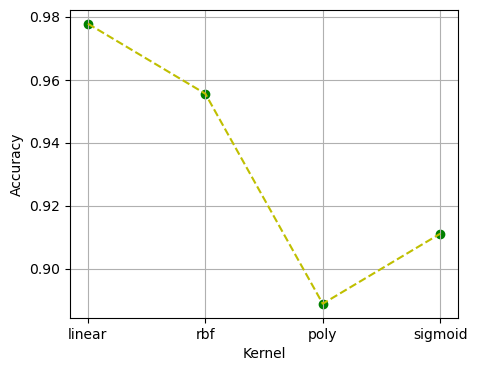

In [42]:
plt.figure(figsize = [5,4])
plt.plot(kernel, acc, ls = "dashed", color = "y")
plt.scatter(kernel, acc,color = "g")


plt.xlabel("Kernel")
plt.ylabel("Accuracy")
plt.grid()

**2) [3 pts] Now you use ‘poly’ kernel. Change the value of coef0 multiple times to your own choice
and show the difference in accuracy. Roughly speaking, it controls how much the model is
influenced by high-degree polynomials. Explain the results of this experiments.**

The coef hyperparameter defines the degree of polynomial. It performs the best with 2nd degree polynomial degree.


In [43]:
coef = [0, 1 , 2, 3]
acc = []

for i in range(len(coef)):
    clf = svm.SVC(kernel = 'poly', coef0 = coef[i])
    clf.fit(X_train, y_train)
    predictions = clf.predict(X_test)
    accuracy = (accuracy_score(y_test, predictions))
    acc.append(accuracy)

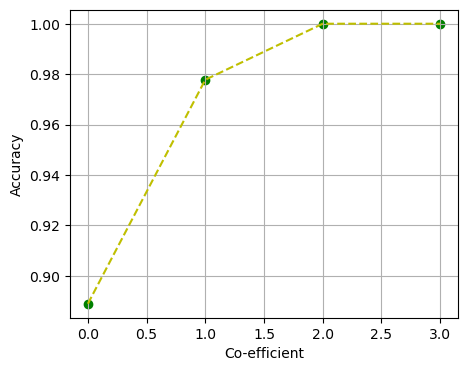

In [44]:
plt.figure(figsize = [5,4])
plt.plot(coef, acc, ls = "dashed", color = "y")
plt.scatter(coef, acc,color = "g")


plt.xlabel("Co-efficient")
plt.ylabel("Accuracy")
plt.grid()

## 2. Clustering (K Means)

In [45]:
kmeans = KMeans(n_clusters=4, max_iter=600, algorithm = 'auto', random_state=0)
kmeans.fit(X_train)
labels = kmeans.predict(X_train)
# cluster labels for each data
label = kmeans.labels_
# center of each clusters
centroids = kmeans.cluster_centers_
# distance within cluster
print("Inertia for KMeans with 4 clusters = %lf " %(kmeans.inertia_))

Inertia for KMeans with 4 clusters = 82.912010 


/home/manishakarim/miniconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/manishakarim/miniconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(


**1) [3 pts] Run KMeans 3 times by changing n_clusters = 2, 3, 5, 7 respectively and show the
mean of each cluster**

In [46]:
n = [2, 3, 5, 7]


for i in range(len(n)):
        kmeans = KMeans(n_clusters=n[i], max_iter=600, random_state=0)
        kmeans.fit(X_train)
        labels = kmeans.predict(X_train)
        # cluster labels for each data
        label = kmeans.labels_
        # center of each clusters
        centroids = kmeans.cluster_centers_
        # distance within cluster
        print("Inertia for KMeans with %i" %(n[i]) + " clusters = %lf " %(kmeans.inertia_))

Inertia for KMeans with 2 clusters = 157.977659 
Inertia for KMeans with 3 clusters = 102.711433 
Inertia for KMeans with 5 clusters = 67.649305 
Inertia for KMeans with 7 clusters = 50.448632 


/home/manishakarim/miniconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/manishakarim/miniconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/manishakarim/miniconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/manishakarim/miniconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_

**2) [3 pts] For the clustering of n_clusters=3, pick one cluster. Show the average value of each
attribute of the data in that cluster.**

In [47]:
kmeans = KMeans(n_clusters=3, max_iter=600, algorithm = 'auto', random_state=0)
kmeans.fit(X_train)
labels = kmeans.predict(X_train)
# cluster labels for each data
label = kmeans.labels_
# center of each clusters
centroids = kmeans.cluster_centers_[0]  #Centroids of 1st cluster
attributes = X.columns

pd.DataFrame({'attributes':attributes, 'average':centroids})

/home/manishakarim/miniconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/manishakarim/miniconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(


,attributes,average
0,0,1.072808
1,1,0.073885
2,2,0.922563
3,3,0.914582


**3) [3 pts] For each cluster, calculate majority (the most frequent) value of class/target value. (let’s
call this ‘cluster label’)**

In [48]:
kmeans = KMeans(n_clusters=3, max_iter=600, algorithm = 'auto', random_state=0)
kmeans.fit(X_train)
labels = kmeans.predict(X_train)
# cluster labels for each data
label = kmeans.labels_
cluster_label = pd.DataFrame({'y' : y_train, 'label': label})

print('\n cluster_label = 0 \n',(cluster_label[label == 0]).value_counts())
print('\n cluster_label = 1 \n',(cluster_label[label == 1]).value_counts())
print('\n cluster_label = 2 \n',(cluster_label[label == 2]).value_counts())



 cluster_label = 0 
 y  label
2  0        24
1  0        12
Name: count, dtype: int64

 cluster_label = 1 
 y  label
0  1        32
Name: count, dtype: int64

 cluster_label = 2 
 y  label
1  2        28
2  2         9
Name: count, dtype: int64


/home/manishakarim/miniconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/manishakarim/miniconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
